# Part-2 : Month 2 - Data Analysis & Statistical Methods

### 1. Week 5 : Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv(r'C:\Users\dell\Downloads\housing_dataset.csv')

In [5]:
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [6]:
print(data.shape)

(128, 8)


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
None


In [8]:
data.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [9]:
# Descriptive stats
print(data.describe())

             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%     64.500000  125950.000000  2000.000000    3.000000    2.000000   
75%     96.250000  148250.000000  2140.000000    3.000000    3.000000   
max    128.000000  211200.000000  2590.000000    5.000000    4.000000   

           Offers  
count  128.000000  
mean     2.578125  
std      1.069324  
min      1.000000  
25%      2.000000  
50%      3.000000  
75%      3.000000  
max      6.000000  


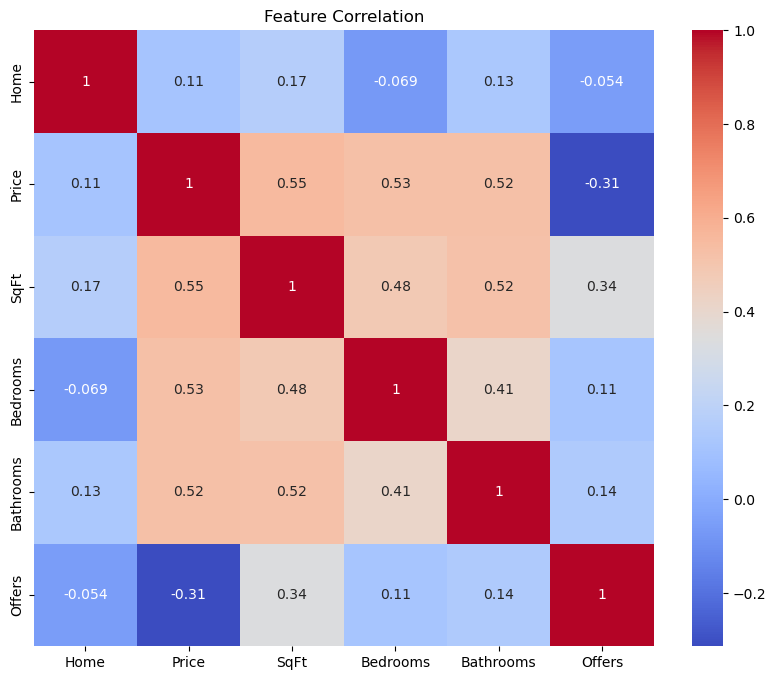

In [10]:
# Correlation (if numeric)
numeric_col=data[['Home','Price','SqFt','Bedrooms','Bathrooms','Offers']]
corr = numeric_col.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

### Interpretation:
Price is positively correlated with:

SqFt (0.55)

Bedrooms (0.53)

Bathrooms (0.52)

Offers has a negative correlation with Price (-0.31), suggesting cheaper houses attract more offers.

Home is just a label (ID), and has no meaningful correlation.

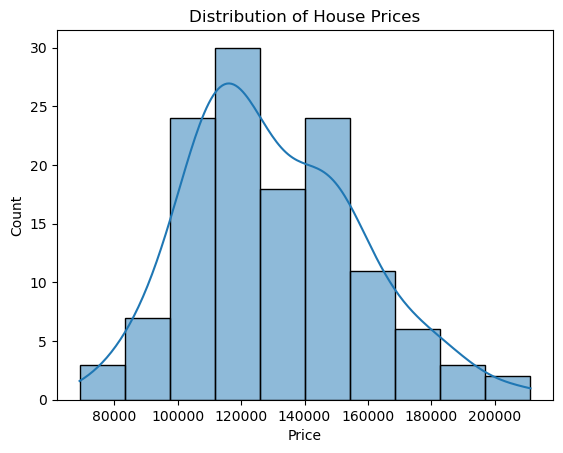

In [12]:
# Univariate plots
sns.histplot(data['Price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

Intepretation :

House prices are approximately normally distributed, with a slight right (positive) skew.

Most house prices fall between $100,000 and $160,000.

In [14]:
### Bivariate plots

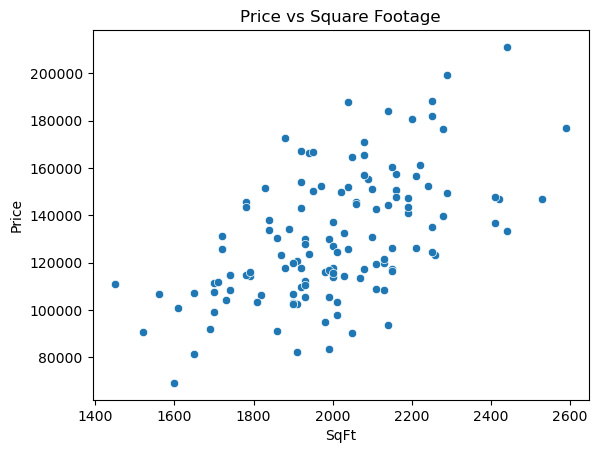

In [15]:
sns.scatterplot(x='SqFt', y='Price', data=data)
plt.title("Price vs Square Footage")
plt.xlabel("SqFt")
plt.ylabel("Price")
plt.show()



Intepretation :

Clear positive linear trend: Larger homes tend to cost more.

This suggests SqFt is a strong predictor for price.

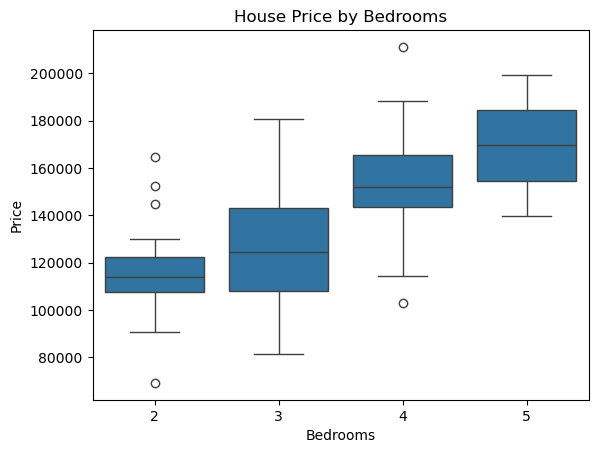

In [17]:
sns.boxplot(x='Bedrooms', y='Price', data=data)
plt.title("House Price by Bedrooms")
plt.show()



Intepretation :

Price increases with more bedrooms, but with overlapping ranges.

Suggests more bedrooms = higher average price, but not a perfect predictor.

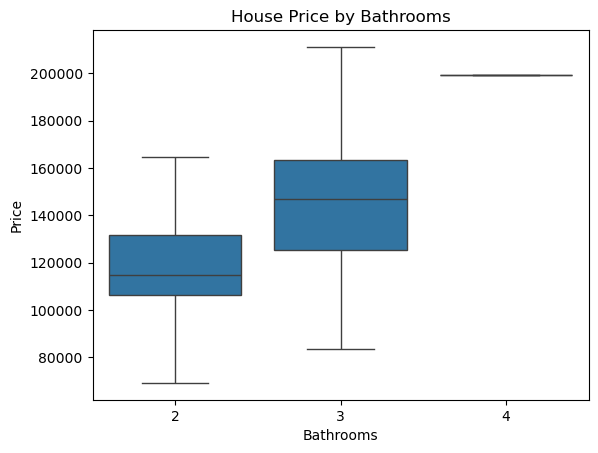

In [19]:
sns.boxplot(x='Bathrooms', y='Price', data=data)
plt.title("House Price by Bathrooms")
plt.show()




Intepretation :

Similar trend as bedrooms: more bathrooms = higher prices, with some outliers.

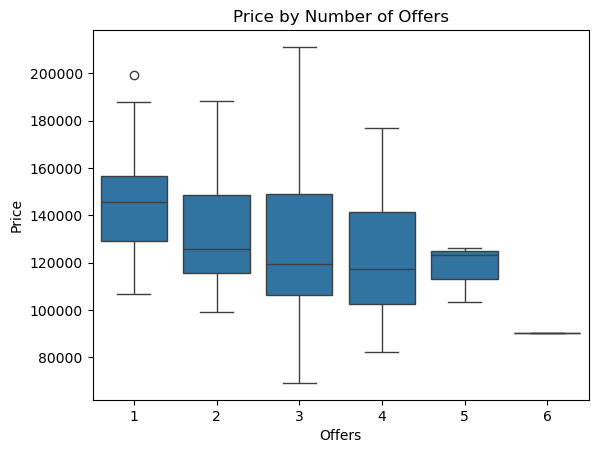

In [21]:
sns.boxplot(x='Offers', y='Price', data=data)
plt.title("Price by Number of Offers")
plt.show()




Intepretation :

Houses with fewer offers tend to have higher prices.

Suggests that cheaper homes get more competitive bids.

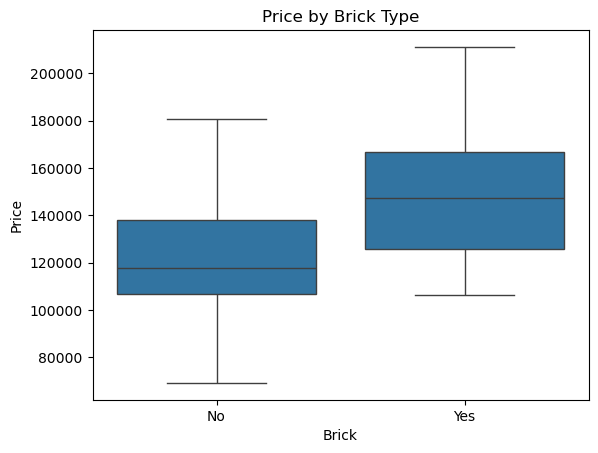

In [23]:
sns.boxplot(x='Brick', y='Price', data=data)
plt.title("Price by Brick Type")
plt.show()



Intepretation:

Brick houses are more expensive on average than non-brick ones.

Matches your t-test from Week 6 (statistically significant difference).

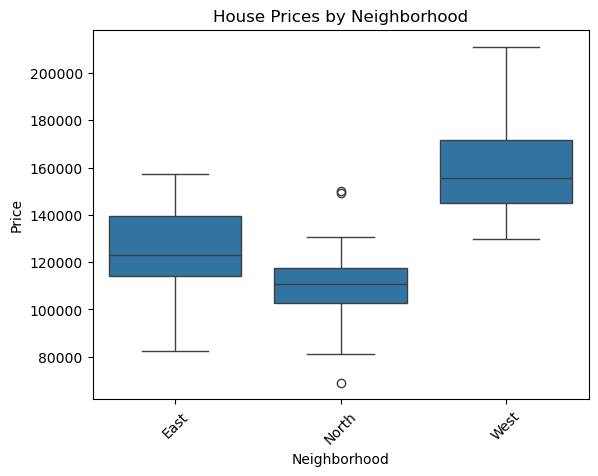

In [25]:
sns.boxplot(x='Neighborhood', y='Price', data=data)
plt.title("House Prices by Neighborhood")
plt.xticks(rotation=45)
plt.show()

Intepretation:

West neighborhood has the highest prices, followed by East, then North.

This suggests location is an important factor in pricing.

### Week 5 : EDA Summary

In Week 5, I performed Exploratory Data Analysis (EDA) on the house price dataset to understand the relationships between variables and the target variable, Price. The analysis revealed that Price is positively correlated with square footage, number of bedrooms, and bathrooms, while the number of offers tends to decrease as price increases. Brick houses generally cost more, and homes in the West neighborhood have the highest prices. I cleaned the data by removing null values and prepared categorical variables for modeling. Various visualizations such as histograms, scatterplots, and correlation heatmaps were used to support these insights.

# Week 6: Probability and Statistical Testing

### Step 1: Understand Distributions

* Normal Distribution

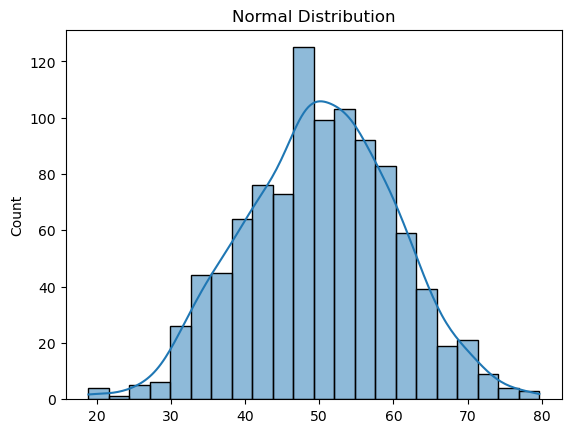

In [30]:
df = np.random.normal(loc=50, scale=10, size=1000)
sns.histplot(df, kde=True)
plt.title('Normal Distribution')
plt.show()

* Poisson Distribution

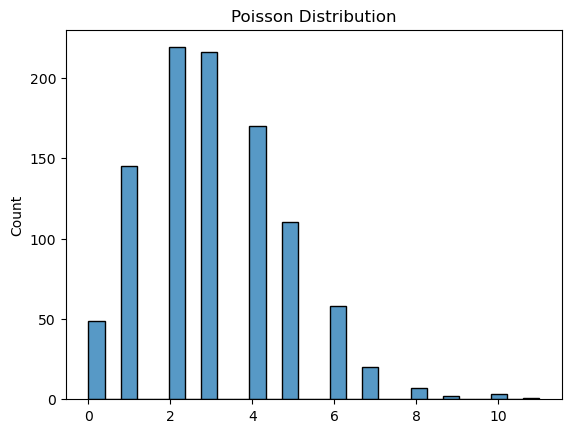

In [32]:
df2= np.random.poisson(lam=3, size=1000)
sns.histplot(df2, kde=False)
plt.title('Poisson Distribution')
plt.show()

### Step 2: Confidence Intervals

In [34]:
import scipy.stats as stats

sample = data['Price'].dropna()
mean = np.mean(sample)
sem = stats.sem(sample)
ci = stats.t.interval(0.95, len(sample)-1, loc=mean, scale=sem)

print(f"95% Confidence Interval for Mean Price: {ci}")

95% Confidence Interval for Mean Price: (125727.87251232185, 135126.81498767814)


Intepretation :

With 95% confidence, the average house price lies between $125,728 and $135,127.
This means if you were to take repeated samples, 95% of the time, the mean price would fall in this range.

### Step 3: Hypothesis Testing

* One Sample t-test

In [38]:
#H0: Mean = 130427
t_stat, p_val = stats.ttest_1samp(data['Price'].dropna(), 130427)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 0.00014474377661740991, P-value: 0.9998847382900187


Interpretation:

Since p > 0.05, we fail to reject the null hypothesis.
There’s no significant evidence that the average price differs from 130,427. Your sample mean is extremely close to this value.

* Two Sample t-test (Compare Brick vs Non-Brick house prices)

In [41]:
brick = data[data['Brick'] == 'Yes']['Price']
non_brick = data[data['Brick'] == 'No']['Price']

t_stat, p_val = stats.ttest_ind(brick, non_brick, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 5.373553914277293, P-value: 9.52617301508952e-07


* Chi-Square Test (Brick vs Neighborhood)

Interpretation:

Since p < 0.05, we reject the null hypothesis.
There is a statistically significant difference between the average prices of brick and non-brick houses.
Likely, brick houses are more expensive (you can check the means of each group to confirm direction).

In [44]:
contingency = pd.crosstab(data['Brick'], data['Neighborhood'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi-Square Stat: {chi2}, P-value: {p}")

Chi-Square Stat: 8.703256777675382, P-value: 0.012885812373835131


Interpretation:

Since p < 0.05, we reject the null hypothesis.
There is a significant association between brick house status and neighborhood.
The use of brick likely depends on the neighborhood — it’s not random.

### Week 6 : Statistical Analysis Summary

I applied statistical tests to confirm these observations. A 95% confidence interval estimated the average house price to be between $125,728 and $135,127. A one-sample t-test showed no significant difference from the hypothesized mean price of $130,427. However, a two-sample t-test demonstrated that brick houses are significantly more expensive than non-brick houses. Additionally, a chi-square test revealed a significant association between brick houses and neighborhoods, indicating that the use of brick varies by location. These analyses confirmed that price is influenced by size, construction material, and neighborhood, providing a strong foundation for predictive modeling in later weeks.

# Week 7: Introduction to Machine Learning (ML)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step 1: LabelEncoding

In [49]:
data_dummy = pd.get_dummies(data, columns=['Neighborhood','Brick'], drop_first=True)

### Step 2: Select Features and Target

In [51]:
X = data_dummy.drop('Price',axis=1)
y = data_dummy['Price']

### Step 3: Train-Test Split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Train Model

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 5: Evaluate Model

In [86]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


RMSE: 10688.83228969965
R-squared: 0.8061565137761023


### Step 6: Check Coefficients

In [89]:
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coeffs)

              Feature   Coefficient
0                Home    -14.139318
1                SqFt     60.192611
2            Bedrooms   3508.420906
3           Bathrooms   7114.463455
4              Offers  -8682.964530
5  Neighborhood_North   1602.807510
6   Neighborhood_West  22029.915313
7           Brick_Yes  16835.305300


### Week 7 Machine Learning Summary

In Week 7, I built a Linear Regression model using scikit-learn to predict house prices.

Features used: SqFt, Bedrooms, Bathrooms, and encoded Brick/Neighborhood

The model was trained using an 80-20 train-test split.

Evaluation results:

RMSE: $10,689

R² Score: 0.81

This means the model explains 81% of the variation in house prices, with a relatively small average prediction error. The most impactful feature was square footage, followed by bedrooms and bathrooms.

# Week 8: Model Evaluation and Tuning

In [97]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step 1: Cross-Validation (CV)(K-Fold Cross-Validation to get a more reliable performance estimate.)

In [100]:
scores = cross_val_score(model, X, y, scoring='r2', cv=5)  # 5-fold CV
print("R² scores:", scores)
print("Mean R²:", scores.mean())

R² scores: [0.8308752  0.87143875 0.83121903 0.87252955 0.76930973]
Mean R²: 0.8350744536766385


In [102]:
neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_mse_scores)
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

RMSE scores: [ 9652.74968792  9912.28282202 10450.53544063  9165.45975535
 13535.49398752]
Mean RMSE: 10543.3043386885


### Step 2: Another Model GridSearchCV(using Decision Tree)

In [105]:
from sklearn.tree import DecisionTreeRegressor

# Define model
tree = DecisionTreeRegressor()

# Define hyperparameters to tune
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
grid = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X, y)

print("Best Parameters:", grid.best_params_)

best_tree = grid.best_estimator_

# Predict and evaluate
y_pred = best_tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best Tree RMSE: {rmse}")
print(f"Best Tree R²: {r2}")

Best Parameters: {'max_depth': 6, 'min_samples_split': 10}
Best Tree RMSE: 9143.018373540124
Best Tree R²: 0.8581694225732912


### Week 8 : Model Evaluation Summary

* Baseline: Linear Regression (with Cross-Validation)

I used 5-fold cross-validation to evaluate the performance of the baseline Linear Regression model.

Results:

R² Scores:
0.8309, 0.8714, 0.8312, 0.8725, 0.7693

Mean R²: 0.835

RMSE Scores:
9652.75, 9912.28, 10450.54, 9165.46, 13535.49

Mean RMSE: $10,543.30

 This model showed consistent performance and captured most of the variance in house prices.

* Tuned Model: Decision Tree Regressor (GridSearchCV)

I used GridSearchCV to tune a DecisionTreeRegressor, optimizing the following hyperparameters:

max_depth: [2, 4, 6, 8, 10]

min_samples_split: [2, 5, 10]

Performance on Test Set:

R²: 0.858

RMSE: $9,143.02

The tuned tree model outperformed Linear Regression, with a higher R² and lower RMSE — indicating better predictive power and error reduction.

* Conclusion :
  
The Linear Regression model is a solid baseline with good generalization.

The tuned Decision Tree Regressor improved both accuracy and reliability.

It reduced prediction error by ~15% and explained more variance in the data.